# EM Natural Image Stats

What are the statistics of natural images - Espeically Electron Microscopy Images?

Images Hand Selected from the Dartmouth EM Facility's Webpage
http://remf.dartmouth.edu/imagesindex.html

In [1]:
#dependencies
import imp
import os
import numpy as np
import matplotlib.pyplot as plt
import fourier_im as fim
import data_readin as dim
import imgtools as imt


#cmoputer specifics
folder = '/data_repo/dartmouth_em_images/'

#analysis params
cosine_window = True
bin_in_log = False

In [2]:
filelist = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.jpg')]
ims = [dim.readin_img(im, 'em') for im in filelist]

## An Example Image

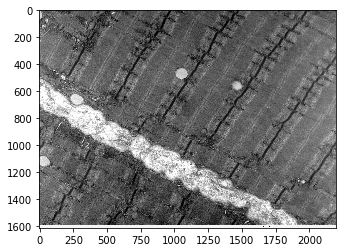

In [3]:
example_im = ims[np.random.randint(len(ims))]
plt.imshow(example_im,cmap='Greys_r')

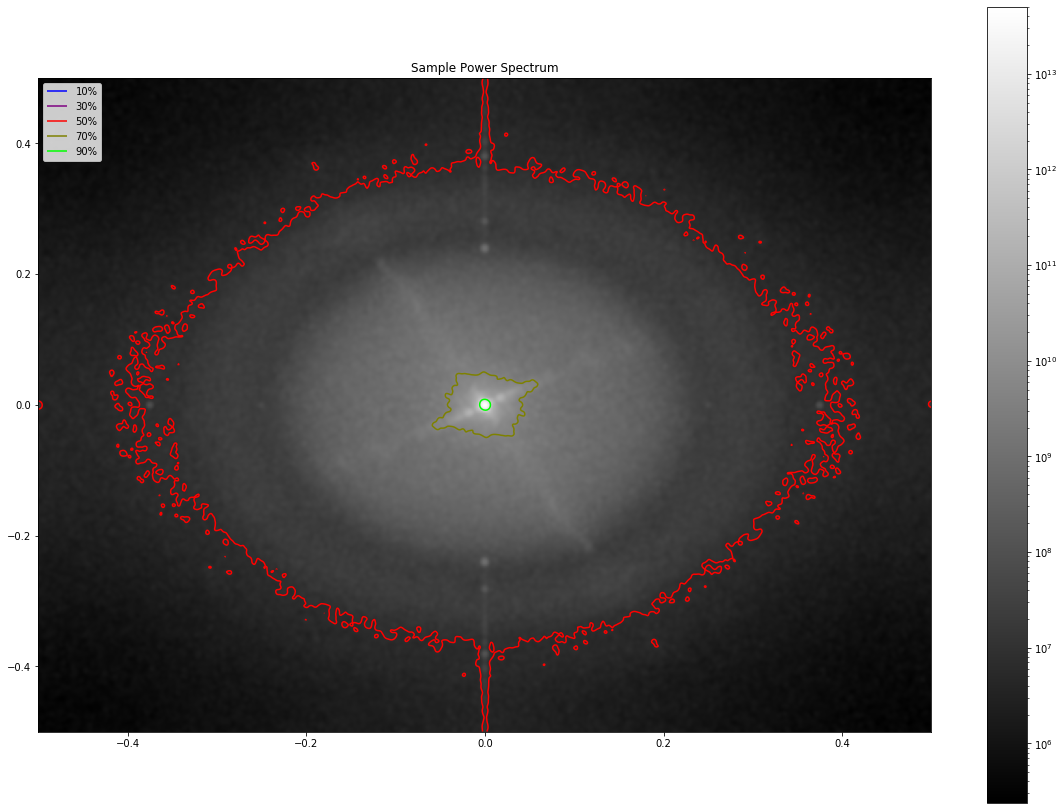

In [4]:
ps, fqs = fim.spatialft(example_im, cosine_window=cosine_window)

fim.contour_plotter(ps, fqs, title='Sample Power Spectrum')

Text(0.5, 1.0, 'Sample Flow Power Spectra')

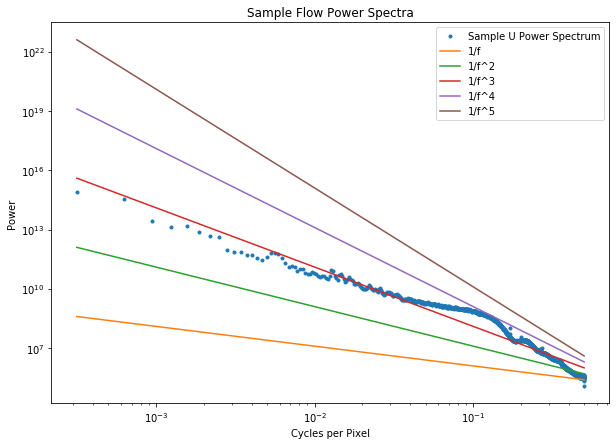

In [5]:
ps_1d, fqs = fim.azimuthalAverage(ps, 0.5, bin_in_log=bin_in_log)
plt.figure(figsize=(10,7))
plt.loglog(fqs, ps_1d, '.', label='Sample U Power Spectrum')
onef = 1/(fqs)* np.min(ps_1d)
onef2 = 1/(fqs)**2 * np.min(ps_1d)
onef3 = 1/(fqs)**3 * np.min(ps_1d)
onef4 = 1/(fqs)**4 * np.min(ps_1d)
onef5 = 1/(fqs)**5 * np.min(ps_1d)

plt.loglog(fqs, onef, label='1/f')
plt.loglog(fqs, onef2, label='1/f^2')
plt.loglog(fqs, onef3, label='1/f^3')
plt.loglog(fqs, onef4, label='1/f^4')
plt.loglog(fqs, onef5, label='1/f^5')

plt.xlabel('Cycles per Pixel')
plt.ylabel('Power')
plt.legend()
plt.title('Sample Flow Power Spectra')

# Mean Power Spectrum of Dataset

Unlike images, flow fields have both vertical and horizontal components. The best thing I can think of now is to analyze these individually and in parallel, with the same methods we use to analyze the power spectrum of images.

In [46]:
cims = imt.crop_ims(ims)
mean_power_spec, fq_spec = fim.get_mean_ps(cims, cosine_window, 'em', ims_raw=True)

Couldn't find mean power spectrum: Calculting now from 8  frames...
Saving...

## 2D Power Spectrum

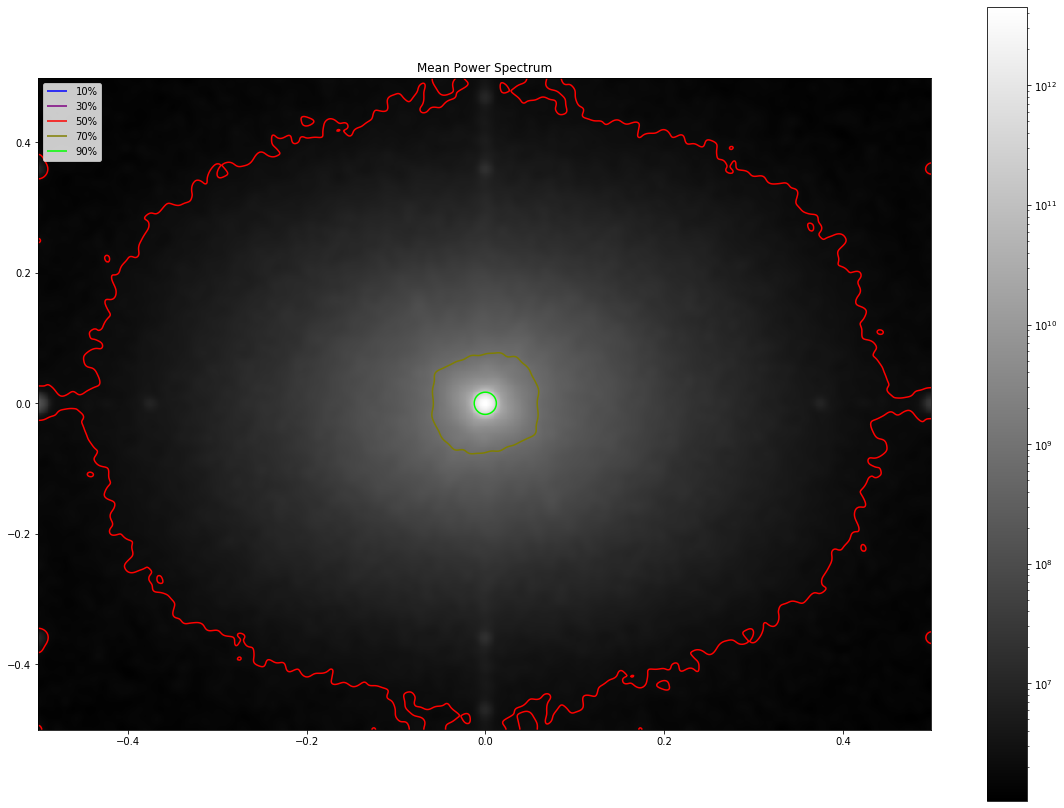

In [47]:
fim.contour_plotter(mean_power_spec, fq_spec, title='Mean Power Spectrum')

## Azimuthal Average -> 1D Power Spectrum

Text(0.5, 1.0, 'Mean Power Spectra of 8 EM Images')

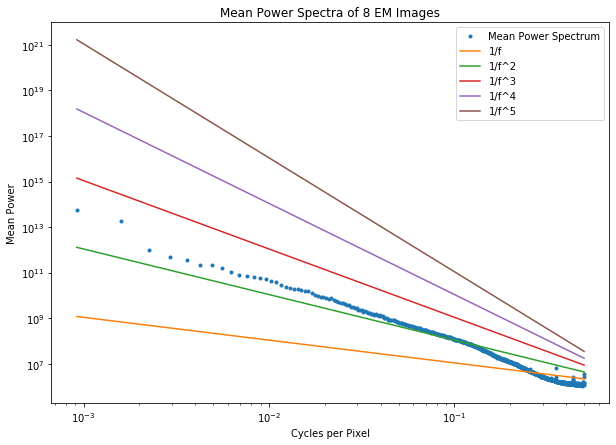

In [48]:
mean_ps_1d, fqs = fim.azimuthalAverage(mean_power_spec, 0.5, bin_in_log=bin_in_log)

plt.figure(figsize=(10,7))
plt.loglog(fqs, mean_ps_1d, '.',label='Mean Power Spectrum')

onef = 1/(fqs) * np.min(mean_ps_1d)
onef2 = 1/(fqs)**2 * np.min(mean_ps_1d)
onef3 = 1/(fqs)**3 * np.min(mean_ps_1d)
onef4 = 1/(fqs)**4 * np.min(mean_ps_1d)
onef5 = 1/(fqs)**5 * np.min(mean_ps_1d)

plt.loglog(fqs, onef, label='1/f')
plt.loglog(fqs, onef2, label='1/f^2')
plt.loglog(fqs, onef3, label='1/f^3')
plt.loglog(fqs, onef4, label='1/f^4')
plt.loglog(fqs, onef5, label='1/f^5')

plt.xlabel('Cycles per Pixel')
plt.ylabel('Mean Power')
plt.legend()
plt.title(f'Mean Power Spectra of {len(ims)} EM Images')